<a href="https://colab.research.google.com/github/jathusharini/intrusion-detection-fewshot-vs-traditional/blob/main/traditional_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


In [10]:
# Load the dataset
data_path = "cleaned_dataset.csv" 
data = pd.read_csv(data_path)

In [11]:
# Handle non-numeric values
non_numeric_columns = data.select_dtypes(include=['object']).columns

for column in non_numeric_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

In [12]:
# Feature selection and target
X = data.drop(columns=['Attack Type', 'Label'])  # Drop non-feature and target columns
y = data['Label']  # Binary classification target

In [13]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}  # Naive Bayes hyperparameter
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [16]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters from GridSearch:", best_params)

Best Parameters from GridSearch: {'var_smoothing': 1e-09}


In [17]:
# Train the final model using best parameters
final_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
final_model.fit(X_train, y_train)

GaussianNB()

In [18]:
# Predict on the test data
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        27
           1       0.91      0.69      0.78        29

    accuracy                           0.80        56
   macro avg       0.82      0.81      0.80        56
weighted avg       0.83      0.80      0.80        56

Accuracy: 0.8035714285714286


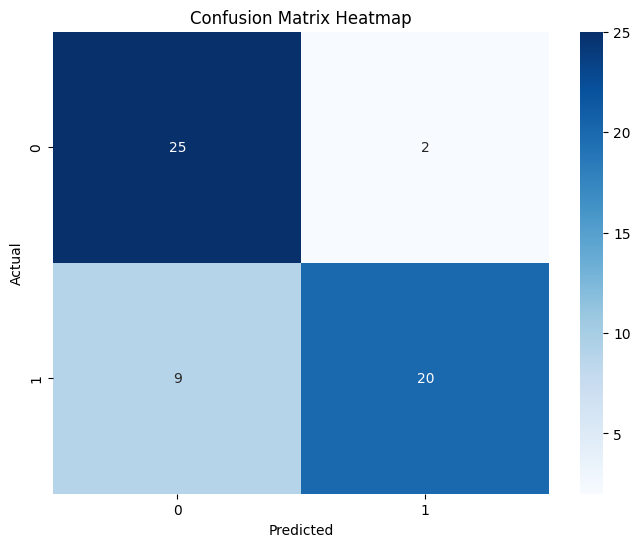

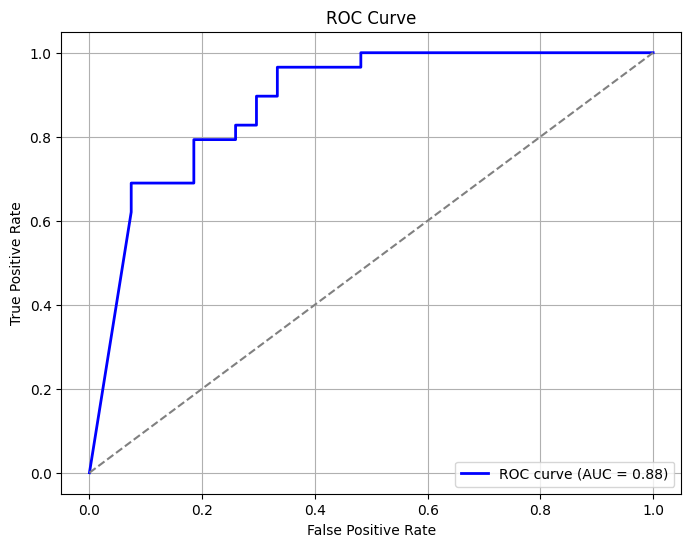

In [19]:
# Visualizations
# Confusion Matrix Heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()